In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load Dataset

In [0]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 2. Plot Equalized Scatterplot

(0.682349462365591, 53.19765053763441, 0.5491096394407654, 10.450890360559237)

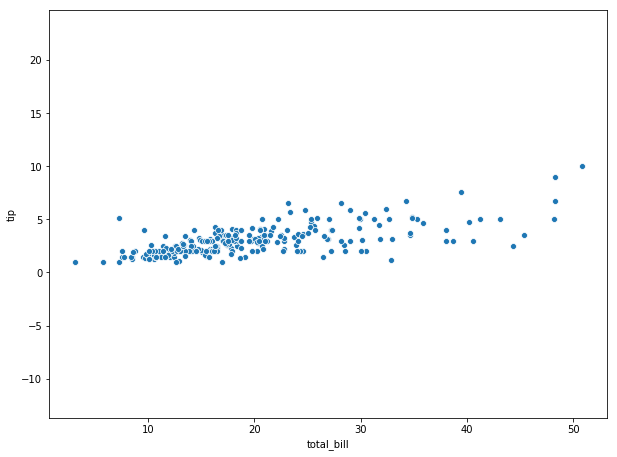

In [0]:
fig = plt.figure(figsize=(10, 7.5))
ax = sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.axis('equal')

# 3. Set Variables and Compute PCA

In [0]:
arr = tips[['total_bill', 'tip']].values

# Standardize features by removing the mean and scaling to unit variance
# The results of PCA depend on the scaling of the variables. This can be 
# cured by scaling each feature by its standard deviation, so that one 
# ends up with dimensionless features with unital variance
arr = StandardScaler().fit_transform(arr)

In [0]:
pca = PCA(n_components=2)
pca.fit(arr)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(f'PCA Components: \n {pca.components_} \n')
print(f'PCA Explained Variance: \n {pca.explained_variance_} \n')
print(f'PCA Explained Variance Ratio: \n {pca.explained_variance_ratio_} \n')

PCA Components: 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]] 

PCA Explained Variance: 
 [1.68263013 0.32560032] 

PCA Explained Variance Ratio: 
 [0.83786705 0.16213295] 



# 4. Plot Principal Components

(-2.15087778285332, 3.761399197235741, -1.7739775349423537, 5.397560088716981)

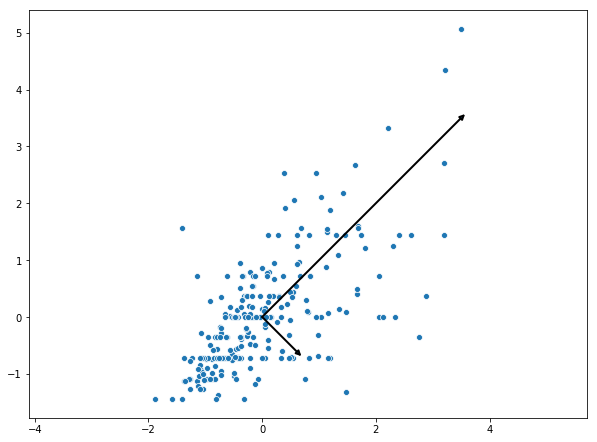

In [0]:
fig = plt.figure(figsize=(10, 7.5))
sns.scatterplot(x=arr[:, 0], y=arr[:, 1])

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * length
    ax = plt.gca()
    ax.annotate('', pca.mean_ + v, pca.mean_, arrowprops=dict(arrowstyle='-|>',
                                                              linewidth=2,
                                                              shrinkA=0, 
                                                              shrinkB=0))
    
plt.axis('equal')